In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the data
credit_data = pd.read_csv('Downloads/credit.csv')
#display the observations
credit_data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [3]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [4]:
#checking the null values
credit_data.isnull().sum().reset_index().rename(columns={'index':'feature_name',0:'null_counts'})

,feature_name,null_counts
0,ID,0
1,Customer_ID,0
2,Month,0
3,Name,0
4,Age,0
5,SSN,0
6,Occupation,0
7,Annual_Income,0
8,Monthly_Inhand_Salary,0
9,Num_Bank_Accounts,0


In [5]:
#to find the duplicated rows
credit_data.duplicated().sum()

0

In [6]:
credit_data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [7]:
drop_na=credit_data.drop(['ID','Customer_ID','Month','Name','SSN','Type_of_Loan','Credit_History_Age'],axis=1,inplace=True)

# EDA

In [8]:
#arranging numerical and categorical columns
credit_cal=credit_data.select_dtypes(include='object')
credit_num=credit_data.select_dtypes(include='number')

In [9]:
credit_cal.describe().T

,count,unique,top,freq
Occupation,100000,15,Lawyer,7096
Credit_Mix,100000,3,Standard,45848
Payment_of_Min_Amount,100000,3,Yes,52326
Payment_Behaviour,100000,6,Low_spent_Small_value_payments,28616
Credit_Score,100000,3,Standard,53174


In [10]:
for cat_col in credit_cal:
    print(credit_cal[cat_col].value_counts())
    print('\n-------------')

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

-------------
Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

-------------
Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

-------------
Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: Payment_Behaviour, dtype: int64

-------------
Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

-------------


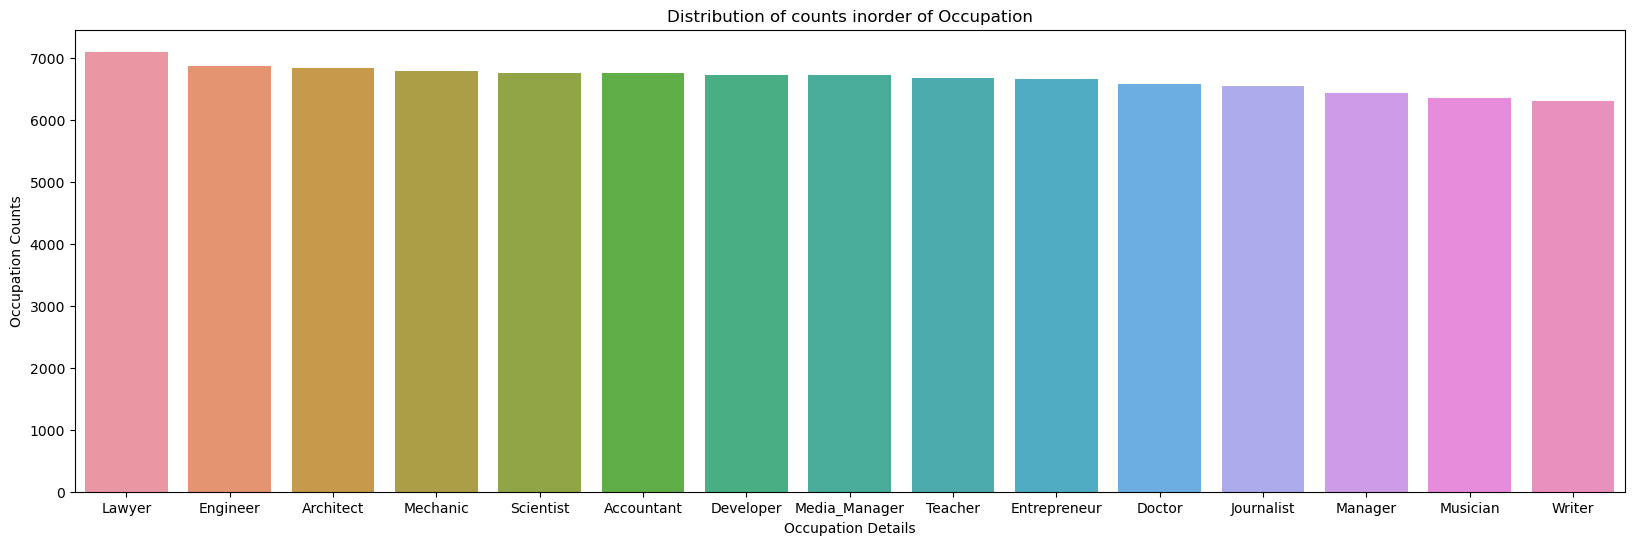

In [11]:
#occupation
plt.figure(figsize=(20,6))
ax=sns.countplot(x='Occupation',data=credit_cal,order=credit_data['Occupation'].value_counts().index)
plt.title('Distribution of counts inorder of Occupation')
plt.xlabel('Occupation Details')
plt.ylabel("Occupation Counts")
plt.show()

Inference: In this countplot we can under occupation 'Lawyer' have more counts.

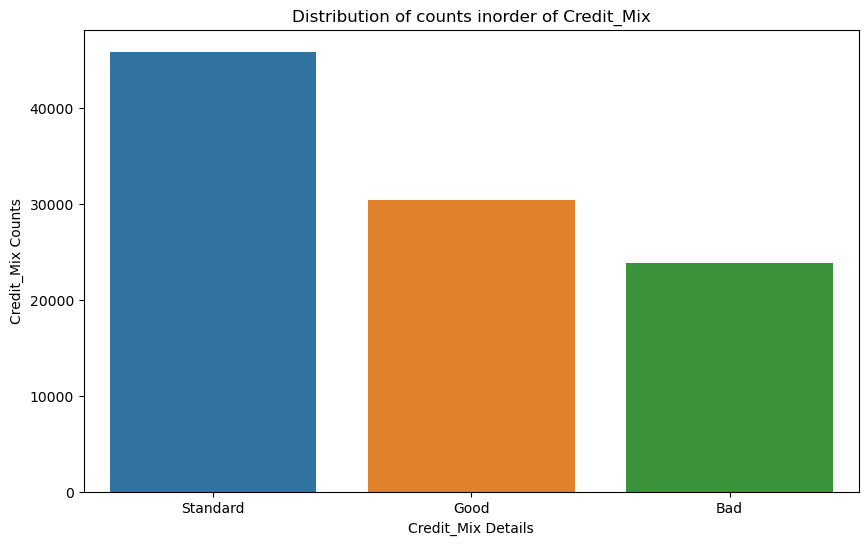

In [12]:
#credit mix
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Credit_Mix',data=credit_cal,order=credit_data['Credit_Mix'].value_counts().index)
plt.title('Distribution of counts inorder of Credit_Mix')
plt.xlabel('Credit_Mix Details')
plt.ylabel("Credit_Mix Counts")
plt.show()

Inference

In this countplot the credit mix count is high in standard

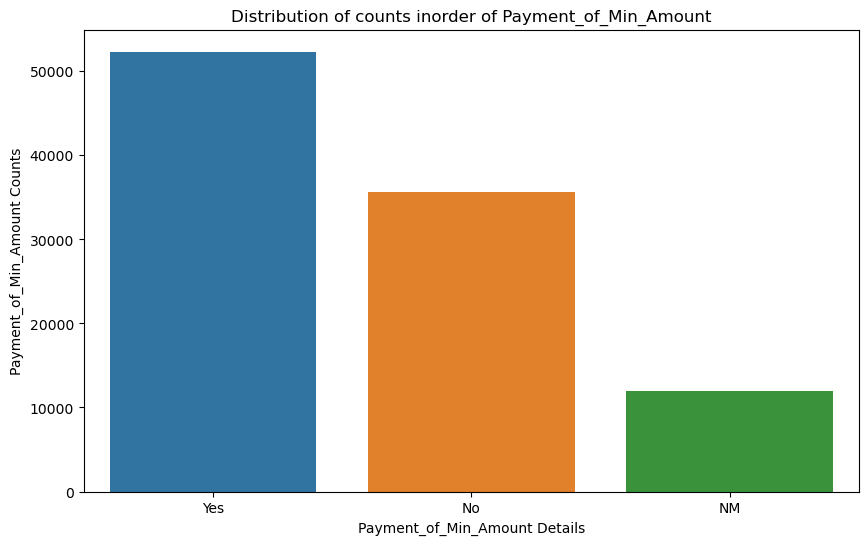

In [13]:
#Payment_of_Min_Amount
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Payment_of_Min_Amount',data=credit_cal,order=credit_data['Payment_of_Min_Amount'].value_counts().index)
plt.title('Distribution of counts inorder of Payment_of_Min_Amount')
plt.xlabel('Payment_of_Min_Amount Details')
plt.ylabel("Payment_of_Min_Amount Counts")
plt.show()

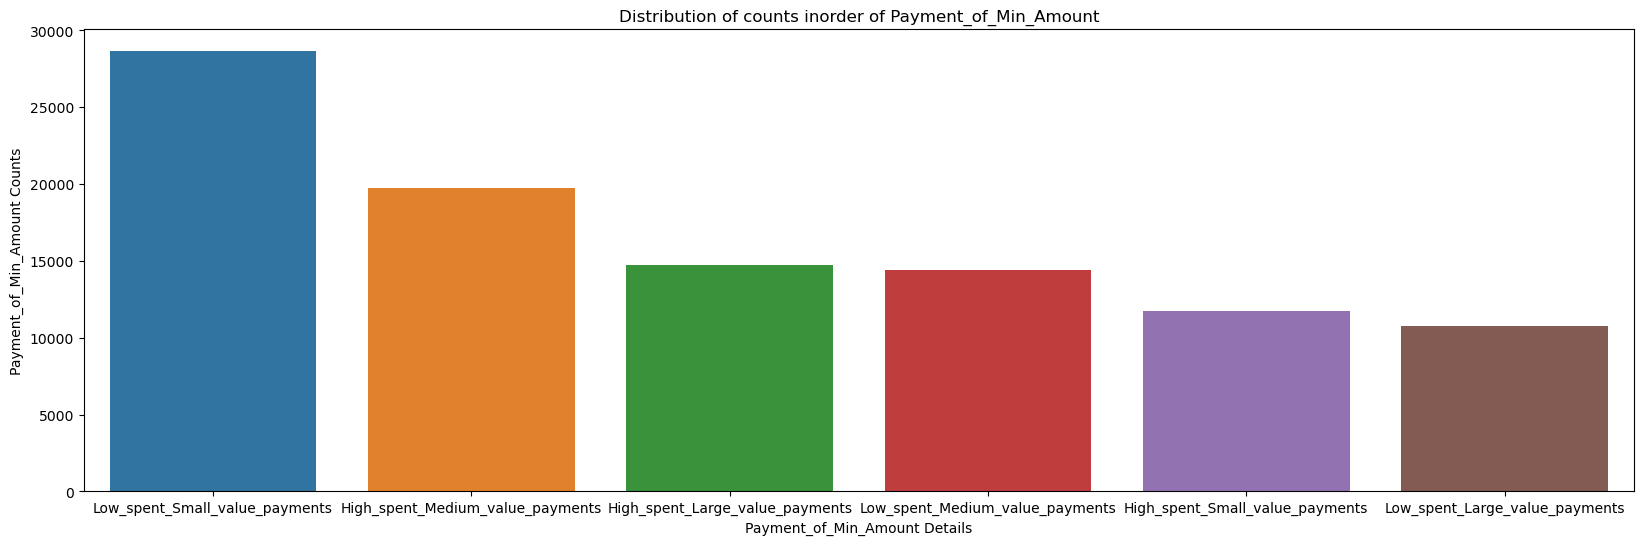

In [14]:
#Payment_Behaviour
plt.figure(figsize=(20,6))
ax=sns.countplot(x='Payment_Behaviour',data=credit_cal,order=credit_data['Payment_Behaviour'].value_counts().index)
plt.title('Distribution of counts inorder of Payment_of_Min_Amount')
plt.xlabel('Payment_of_Min_Amount Details')
plt.ylabel("Payment_of_Min_Amount Counts")
plt.show()

Inference

In this graph we can see in payment behavior low_spent_small_value_payments is high

<Axes: xlabel='Credit_Score', ylabel='count'>

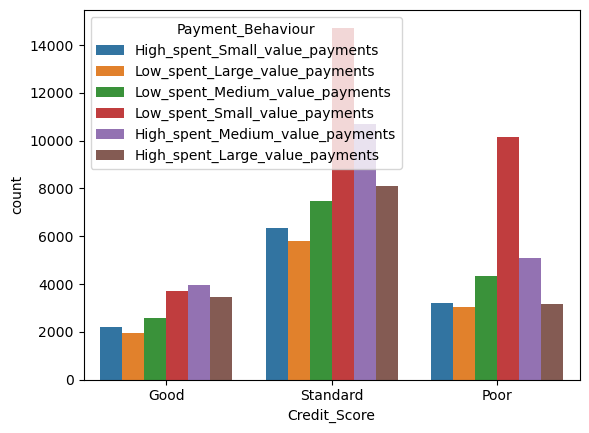

In [15]:
sns.countplot(data=credit_cal,x='Credit_Score',hue='Payment_Behaviour')

Inference : In this plot we can see that payment behaviour is high on standard credit score

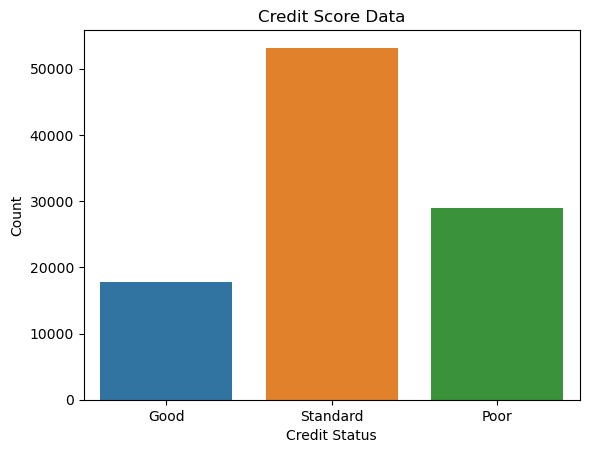

In [16]:
#Credit Score Data
ax = sns.countplot(x = 'Credit_Score',data = credit_data)
plt.title('Credit Score Data')
plt.xlabel('Credit Status')
plt.ylabel('Count')
plt.show()

Inference: In this countplot of credit scores reveals a roughly symmetric distribution, indicating that the majority of individuals have credit scores clustered around the central tendency

In [17]:
#to get statistics value of credit_num
credit_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,33.316340,10.764812,14.000000,24.000000,33.000000,42.000000,56.000000
Annual_Income,100000.0,50505.123449,38299.422093,7005.930000,19342.972500,36999.705000,71683.470000,179987.280000
Monthly_Inhand_Salary,100000.0,4197.270835,3186.432497,303.645417,1626.594167,3095.905000,5957.715000,15204.633333
Num_Bank_Accounts,100000.0,5.368820,2.593314,0.000000,3.000000,5.000000,7.000000,11.000000
Num_Credit_Card,100000.0,5.533570,2.067098,0.000000,4.000000,5.000000,7.000000,11.000000
Interest_Rate,100000.0,14.532080,8.741330,1.000000,7.000000,13.000000,20.000000,34.000000
Num_of_Loan,100000.0,3.532880,2.446356,0.000000,2.000000,3.000000,5.000000,9.000000
Delay_from_due_date,100000.0,21.081410,14.804560,0.000000,10.000000,18.000000,28.000000,62.000000
Num_of_Delayed_Payment,100000.0,13.313120,6.237166,0.000000,9.000000,14.000000,18.000000,25.000000
Changed_Credit_Limit,100000.0,10.470323,6.609481,0.500000,5.380000,9.400000,14.850000,29.980000


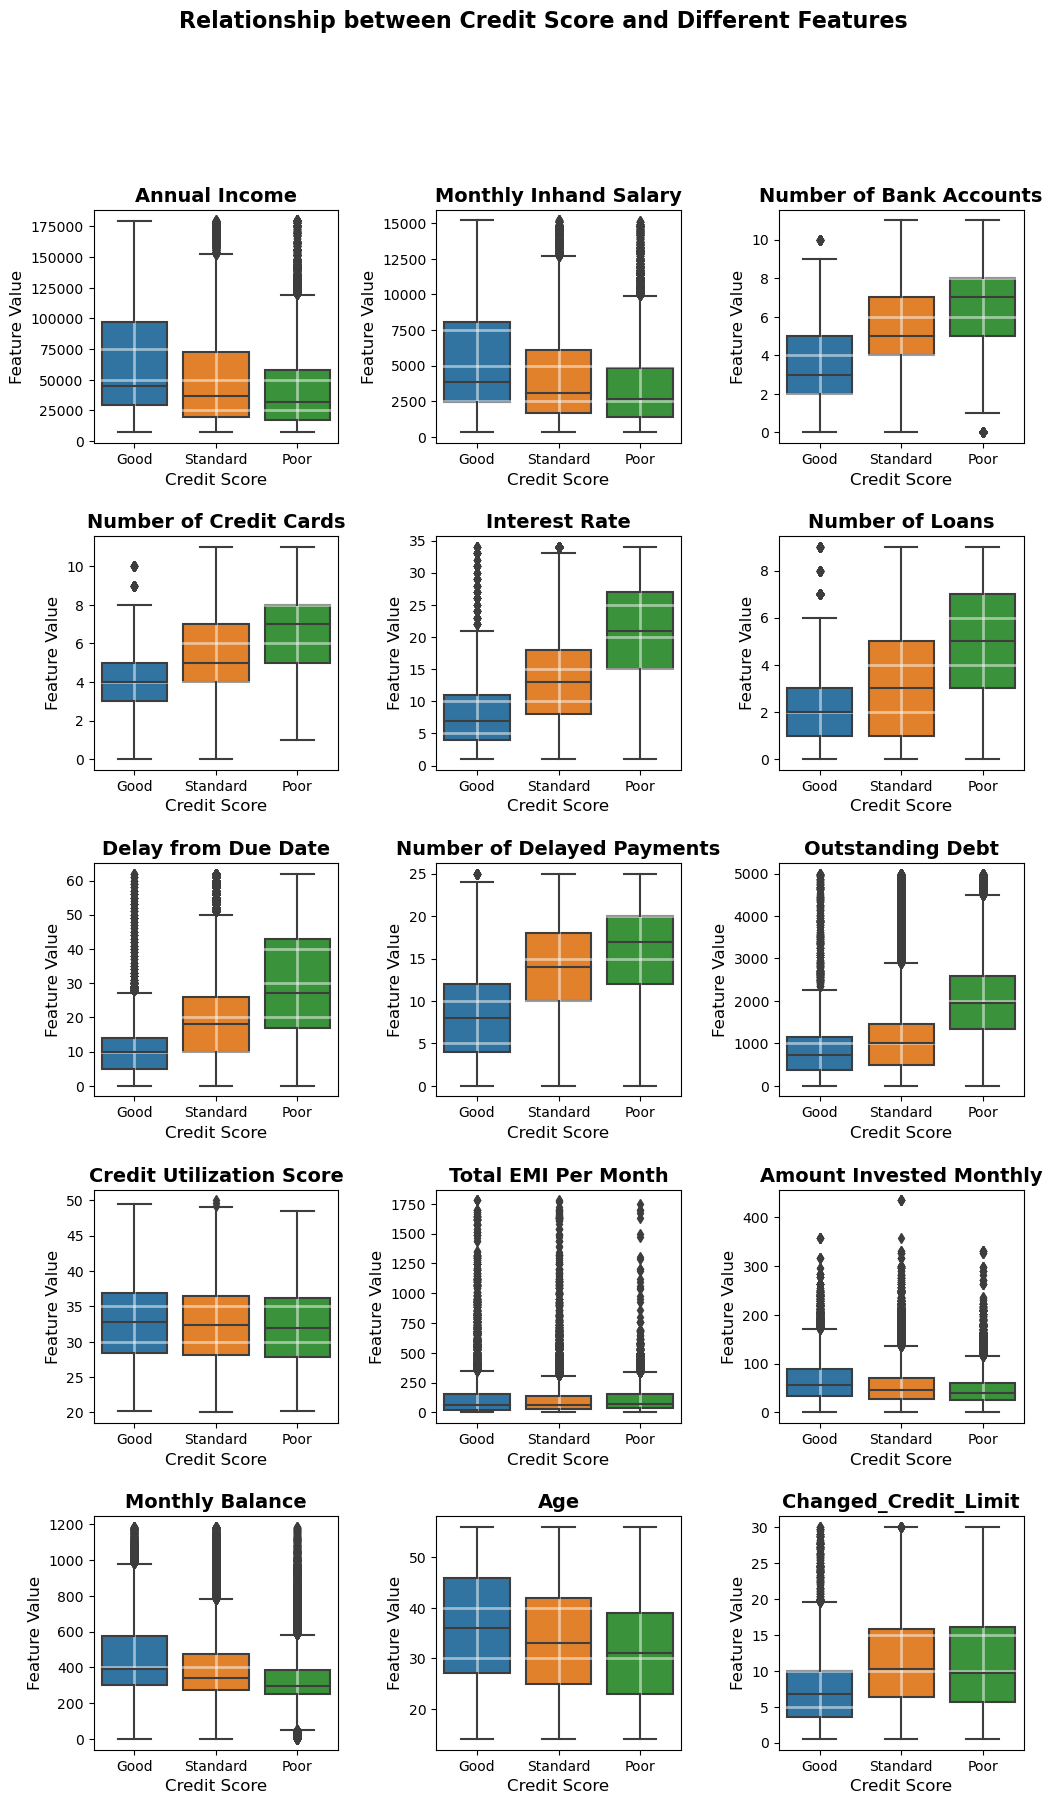

In [18]:
# Create a figure and 2x3 grid of subplots
fig, ax = plt.subplots(5, 3, figsize=(12, 20))

# Flatten the 2D array of subplots into a 1D array
ax = ax.flatten()

# Plot multiple box plots on the same axis

sns.boxplot(x='Credit_Score', y='Annual_Income', data=credit_data, ax=ax[0])
sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=credit_data, ax=ax[1])
sns.boxplot(x='Credit_Score', y='Num_Bank_Accounts', data=credit_data, ax=ax[2])
sns.boxplot(x='Credit_Score', y='Num_Credit_Card', data=credit_data, ax=ax[3])
sns.boxplot(x='Credit_Score', y='Interest_Rate', data=credit_data, ax=ax[4])
sns.boxplot(x='Credit_Score', y='Num_of_Loan', data=credit_data, ax=ax[5])
sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=credit_data, ax=ax[6])
sns.boxplot(x='Credit_Score', y='Num_of_Delayed_Payment', data=credit_data, ax=ax[7])
sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=credit_data, ax=ax[8])
sns.boxplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=credit_data, ax=ax[9])
sns.boxplot(x='Credit_Score', y='Total_EMI_per_month', data=credit_data, ax=ax[10])
sns.boxplot(x='Credit_Score', y='Amount_invested_monthly', data=credit_data, ax=ax[11])
sns.boxplot(x='Credit_Score', y='Monthly_Balance', data=credit_data, ax=ax[12])
sns.boxplot(x='Credit_Score', y='Age', data=credit_data, ax=ax[13])
sns.boxplot(x='Credit_Score', y='Changed_Credit_Limit', data=credit_data, ax=ax[14])


# Add a title and labels
plt.xlabel('Credit Score')
plt.ylabel('Feature Value')

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Add a white grid
for i in range(15):
    ax[i].grid(color='white', linestyle='-', linewidth=2, alpha=0.5)

# Add a title and labels
fig.suptitle('Relationship between Credit Score and Different Features', fontsize=16, fontweight='bold')

# Set the font size for all subplot titles
titles = ['Annual Income', 'Monthly Inhand Salary', 'Number of Bank Accounts', 'Number of Credit Cards',
          'Interest Rate', 'Number of Loans', 'Delay from Due Date', 'Number of Delayed Payments',
          'Outstanding Debt', 'Credit Utilization Score', 'Total EMI Per Month',
          'Amount Invested Monthly', 'Monthly Balance', 'Age','Changed_Credit_Limit']

for i in range(15):
    ax[i].set_title(titles[i], fontsize=14, fontweight='bold')

    # Set the font size for all x and y labels
for i in range(15):
    ax[i].set_xlabel('Credit Score', fontsize=12)
    ax[i].set_ylabel('Feature Value', fontsize=12)

# Show the plot
plt.show()

Inference

1. In first boxplot,the more someone earns anually, the better their credit score is
2. In Second boxplat,similar to annual income, higher the monthly in-hand salary leads to a better credit score.
3. The ideal number of bank accounts is 2 - 4. Having more than 5 negatively affects your credit score.
4. Similar to bank accounts, having more than 5 credit cards will negatively affect your credit scores. The ideal number is 3-5.
5. A good interest rate is 4-11%
6. Take 1-3 loans at a time inorder to keep a good credit score. Having more than 3 loans will negatively impacts credtit scores.
7. To maintain a good credit score, you have a 5-14 day delay window.Delaying for more than 17 days affects your credit score negatively.
8. Delaying 4-12 payments from the due date is the safety window.Anything above 12 payments negatively affexts credit scores.
9. An outstanding debt of 1150 will not affect your credit scores, but going above 1500 affects your credit scores negatively.
10. Your credit utilization ratio doesn’t affect your credit scores.
11. The number of EMIs you are paying in a month doesn’t affect credit scores that much.
12. How much you invest monthly doesn’t really affect your credit scores.
13. Having a high monthly balance in your account at the end of the month is good for your credit scores, more the better.
14. Credit scores tend to improve with an increase in age.

In [19]:
corr_format= credit_num.corr()
corr_format

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Age,1.000000,0.091525,0.090636,-0.190415,-0.148567,-0.217557,-0.213533,-0.174119,-0.184264,-0.157254,-0.250960,-0.202374,0.025492,-0.047334,0.071045,0.116098
Annual_Income,0.091525,1.000000,0.998154,-0.284060,-0.217852,-0.302352,-0.255560,-0.250105,-0.286297,-0.176353,-0.280242,-0.269319,0.175930,0.438106,0.806281,0.625640
Monthly_Inhand_Salary,0.090636,0.998154,1.000000,-0.283181,-0.216847,-0.301858,-0.254298,-0.249438,-0.285360,-0.176187,-0.279736,-0.269044,0.176092,0.421836,0.807326,0.626631
Num_Bank_Accounts,-0.190415,-0.284060,-0.283181,1.000000,0.442694,0.584302,0.472483,0.560193,0.601842,0.333794,0.518323,0.507063,-0.071783,0.050035,-0.227828,-0.286709
Num_Credit_Card,-0.148567,-0.217852,-0.216847,0.442694,1.000000,0.497912,0.417960,0.479762,0.423300,0.255495,0.459429,0.490376,-0.055249,0.058853,-0.174600,-0.231913
Interest_Rate,-0.217557,-0.302352,-0.301858,0.584302,0.497912,1.000000,0.559156,0.589185,0.571457,0.370156,0.632562,0.629414,-0.075700,0.071651,-0.242479,-0.317919
Num_of_Loan,-0.213533,-0.255560,-0.254298,0.472483,0.417960,0.559156,1.000000,0.501599,0.473919,0.374602,0.565087,0.638713,-0.100469,0.328485,-0.214254,-0.429416
Delay_from_due_date,-0.174119,-0.250105,-0.249438,0.560193,0.479762,0.589185,0.501599,1.000000,0.541627,0.296571,0.539919,0.572206,-0.063823,0.078820,-0.201737,-0.272273
Num_of_Delayed_Payment,-0.184264,-0.286297,-0.285360,0.601842,0.423300,0.571457,0.473919,0.541627,1.000000,0.329311,0.499689,0.504019,-0.073774,0.053653,-0.228459,-0.286045
Changed_Credit_Limit,-0.157254,-0.176353,-0.176187,0.333794,0.255495,0.370156,0.374602,0.296571,0.329311,1.000000,0.382673,0.463684,-0.047903,0.068333,-0.146724,-0.198706


<Axes: >

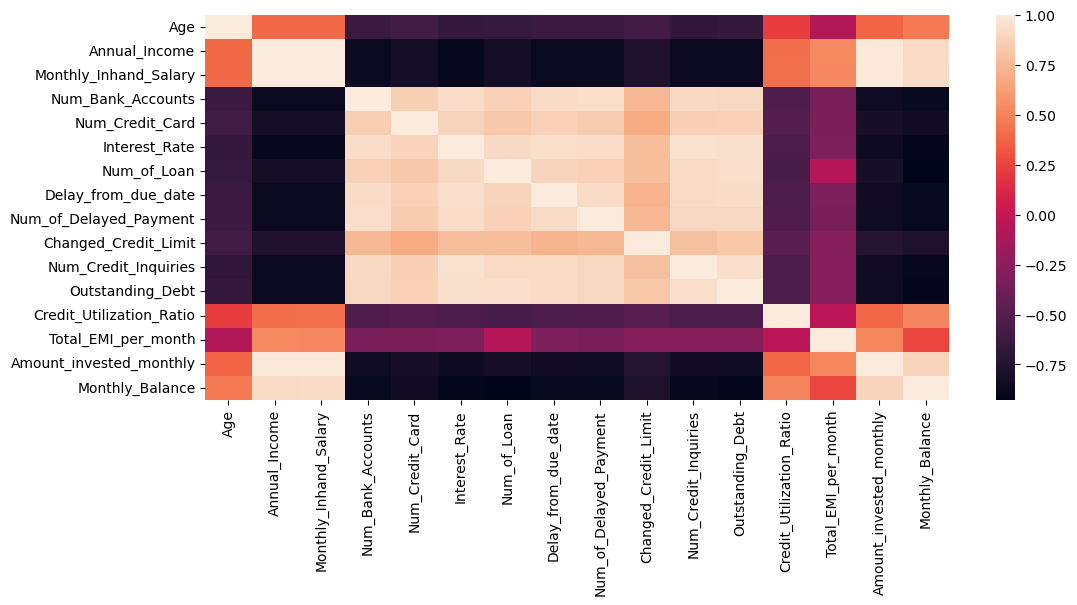

In [20]:
#correlation Analysis
plt.figure(figsize=(12,5))
sns.heatmap(corr_format.corr())

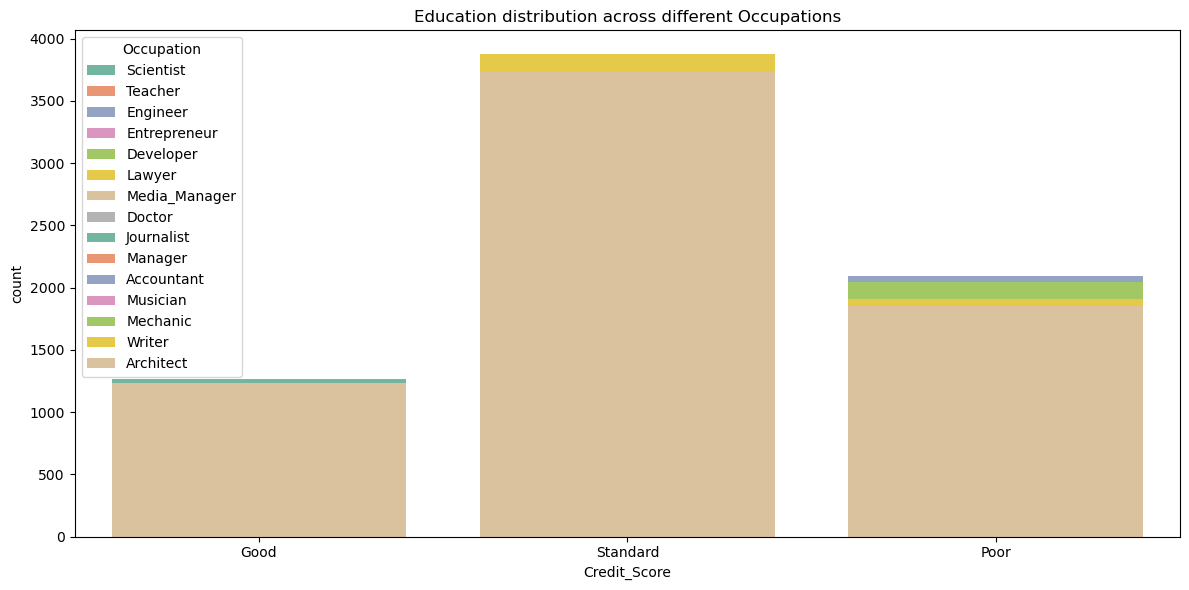

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Credit_Score', hue='Occupation', data=credit_data, palette='Set2', dodge=False)
plt.title('Education distribution across different Occupations')
plt.tight_layout()
plt.show()

NFERENCE

The plot comparing credit scores across different occupations reveals interesting insights into the distribution of credit scores within each occupation category..We observe that the distribution of credit scores varies noticeably across occupations, indicating potential differences in creditworthiness among different groups of individuals. The distribution of credit scores across occupations underscore the importance of considering occupation as a factor in credit assessment and risk management.

Text(0.5, 1.0, 'Credit_Score by Num_Credit_Inquiries')

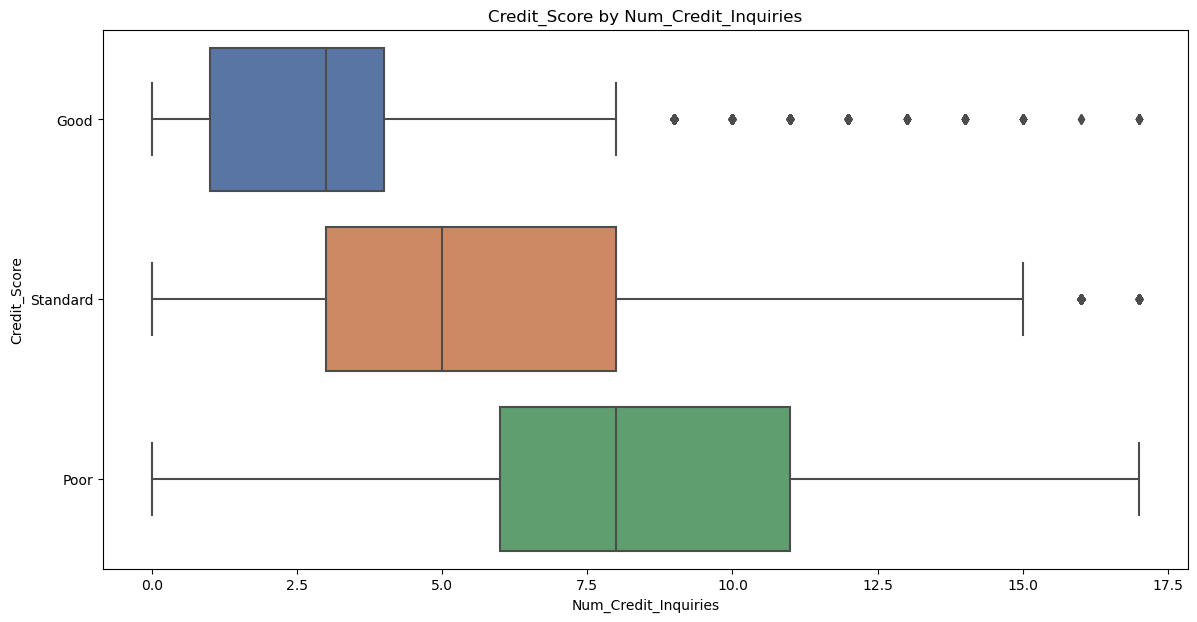

In [61]:
plt.figure(figsize=(14,7))
sns.boxplot(x='Num_Credit_Inquiries',y='Credit_Score',data=credit_data,palette='deep')
plt.title('Credit_Score by Num_Credit_Inquiries')

Inference :  Checking credit score by number of credit inquiries

In [23]:
credit_cal.columns


Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [24]:

credit_num.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

# check and drop outlier

In [25]:
df_cleaned = credit_data

In [26]:
df_cleaned.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.316340,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,107.699208,55.101315,392.697586
std,10.764812,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,132.267056,39.006932,201.652719
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,24.000000,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,29.268886,27.959111,267.615983
50%,33.000000,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,66.462304,45.156550,333.865366
75%,42.000000,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,147.392573,71.295797,463.215683
max,56.000000,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,1779.103254,434.191089,1183.930696


In [27]:
# Drop outlier by IQR calculation
Q1 = df_cleaned.Annual_Income.quantile(0.25)
Q3 = df_cleaned.Annual_Income.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Annual_Income'] > (Q3 + 1.5 * IQR)].index)
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Annual_Income'] < (Q1 - 1.5 * IQR)].index)
df_cleaned

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,4.0,Good,809.98,26.822620,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,4.0,Good,809.98,31.944960,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,4.0,Good,809.98,28.609352,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,4.0,Good,809.98,31.377862,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,4.0,Good,809.98,24.797347,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,3.0,Good,502.38,34.663572,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,3.0,Good,502.38,40.565631,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,...,3.0,Good,502.38,41.255522,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,...,3.0,Good,502.38,33.638208,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [28]:
df_cleaned.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.00000,98000.000000,98000.000000,98000.000000,98000.000000
mean,33.267755,48146.017158,4001.079176,5.423092,5.558388,14.693878,3.565224,21.327173,13.463286,10.559846,5.858398,1440.59910,32.215992,105.103851,53.103673,387.594678
std,10.755540,34885.721913,2902.455107,2.580652,2.066833,8.740399,2.452806,14.827213,6.186613,6.624490,3.872829,1160.98979,5.082255,127.546863,36.120089,194.132479
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.23000,20.000000,0.000000,0.000000,0.007760
25%,24.000000,19193.420000,1615.457500,4.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.480000,3.000000,573.89000,27.998811,29.029993,27.548317,267.371294
50%,33.000000,36348.670000,3038.215833,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.480000,6.000000,1179.15000,32.237266,65.316698,44.364131,332.441286
75%,42.000000,69601.240000,5783.066667,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,15.020000,9.000000,1974.97000,36.431766,143.671607,69.241258,456.626256
max,56.000000,150131.680000,12713.010000,11.000000,11.000000,34.000000,9.000000,62.000000,25.000000,29.980000,17.000000,4998.07000,48.337291,1775.000000,434.191089,1183.625104


<Axes: xlabel='Annual_Income'>

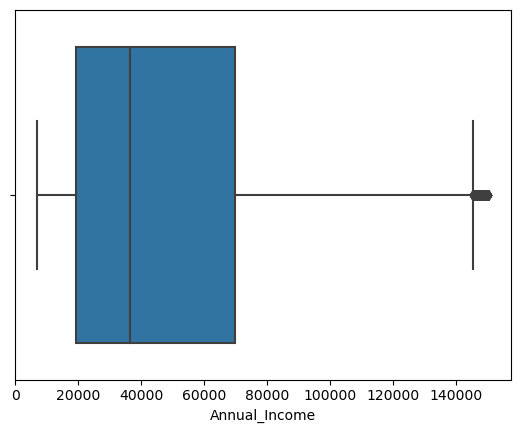

In [29]:
sns.boxplot(x=df_cleaned['Annual_Income'])

<Axes: xlabel='Outstanding_Debt'>

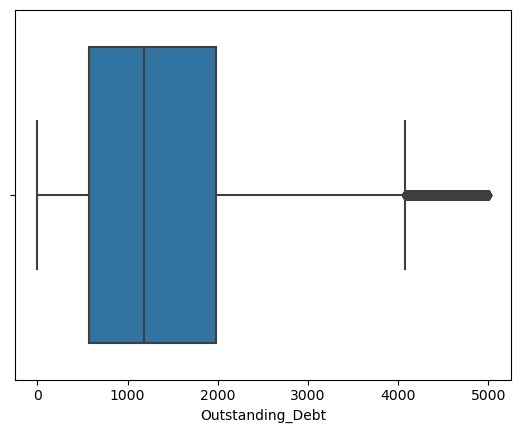

In [30]:
sns.boxplot(x=df_cleaned['Outstanding_Debt'])

# Normalization

In [31]:
df_cleaned

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,4.0,Good,809.98,26.822620,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,4.0,Good,809.98,31.944960,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,4.0,Good,809.98,28.609352,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,4.0,Good,809.98,31.377862,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,4.0,Good,809.98,24.797347,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,3.0,Good,502.38,34.663572,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,3.0,Good,502.38,40.565631,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,...,3.0,Good,502.38,41.255522,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,...,3.0,Good,502.38,33.638208,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [32]:
from sklearn.preprocessing import MinMaxScaler

# Select columns to scale
columns_to_scale = ['Credit_Utilization_Ratio', 'Monthly_Balance']

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the selected columns
for i in df_cleaned[columns_to_scale]:
    df_cleaned[i] = scaler.fit_transform(df_cleaned[[i]])
df_cleaned

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,4.0,Good,809.98,0.240765,No,49.574949,21.465380,High_spent_Small_value_payments,0.264010,Good
1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,4.0,Good,809.98,0.421528,No,49.574949,21.465380,Low_spent_Large_value_payments,0.240467,Good
2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,4.0,Good,809.98,0.303817,No,49.574949,21.465380,Low_spent_Medium_value_payments,0.279822,Good
3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,4.0,Good,809.98,0.401516,No,49.574949,21.465380,Low_spent_Small_value_payments,0.188780,Good
4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,4.0,Good,809.98,0.169294,No,49.574949,21.465380,High_spent_Medium_value_payments,0.288507,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,3.0,Good,502.38,0.517466,No,35.104023,24.028477,High_spent_Large_value_payments,0.405417,Poor
99996,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,3.0,Good,502.38,0.725744,No,35.104023,24.028477,High_spent_Medium_value_payments,0.419598,Poor
99997,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,...,3.0,Good,502.38,0.750090,No,35.104023,24.028477,High_spent_Large_value_payments,0.436629,Poor
99998,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,...,3.0,Good,502.38,0.481281,No,35.104023,24.028477,Low_spent_Large_value_payments,0.269646,Standard


# Encoding

In [33]:
credit_cal.columns

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [34]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
df_cleaned['Occupation']=label_encoder.fit_transform(df_cleaned['Occupation'])
df_cleaned['Credit_Mix']=label_encoder.fit_transform(df_cleaned['Credit_Mix'])
df_cleaned['Payment_of_Min_Amount']=label_encoder.fit_transform(df_cleaned['Payment_of_Min_Amount'])
df_cleaned['Payment_Behaviour']=label_encoder.fit_transform(df_cleaned['Payment_Behaviour'])
df_cleaned.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,4.0,1,809.98,0.240765,1,49.574949,21.46538,2,0.264010,Good
1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,4.0,1,809.98,0.421528,1,49.574949,21.46538,3,0.240467,Good
2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,4.0,1,809.98,0.303817,1,49.574949,21.46538,4,0.279822,Good
3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,4.0,1,809.98,0.401516,1,49.574949,21.46538,5,0.188780,Good
4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,4.0,1,809.98,0.169294,1,49.574949,21.46538,1,0.288507,Good


In [35]:
df_cleaned.shape

(98000, 21)

In [36]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       98000 non-null  float64
 1   Occupation                98000 non-null  int32  
 2   Annual_Income             98000 non-null  float64
 3   Monthly_Inhand_Salary     98000 non-null  float64
 4   Num_Bank_Accounts         98000 non-null  float64
 5   Num_Credit_Card           98000 non-null  float64
 6   Interest_Rate             98000 non-null  float64
 7   Num_of_Loan               98000 non-null  float64
 8   Delay_from_due_date       98000 non-null  float64
 9   Num_of_Delayed_Payment    98000 non-null  float64
 10  Changed_Credit_Limit      98000 non-null  float64
 11  Num_Credit_Inquiries      98000 non-null  float64
 12  Credit_Mix                98000 non-null  int32  
 13  Outstanding_Debt          98000 non-null  float64
 14  Credit

In [76]:
data=df_cleaned
data

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,4.0,1,809.98,0.240765,1,49.574949,21.465380,2,0.264010,Good
1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,4.0,1,809.98,0.421528,1,49.574949,21.465380,3,0.240467,Good
2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,4.0,1,809.98,0.303817,1,49.574949,21.465380,4,0.279822,Good
3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,4.0,1,809.98,0.401516,1,49.574949,21.465380,5,0.188780,Good
4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,4.0,1,809.98,0.169294,1,49.574949,21.465380,1,0.288507,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,3.0,1,502.38,0.517466,1,35.104023,24.028477,0,0.405417,Poor
99996,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,3.0,1,502.38,0.725744,1,35.104023,24.028477,1,0.419598,Poor
99997,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,...,3.0,1,502.38,0.750090,1,35.104023,24.028477,0,0.436629,Poor
99998,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,...,3.0,1,502.38,0.481281,1,35.104023,24.028477,3,0.269646,Standard


# Splitting data 

In [37]:
df_train_x = df_cleaned.drop('Credit_Score',axis = 1)
df_train_y = df_cleaned['Credit_Score']
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.3, random_state=42)

In [38]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train_samp, y_train_samp = sm.fit_resample(x_train, y_train)
unique, counts = np.unique(y_train_samp, return_counts=True)
print(dict(zip(unique, counts)))

{'Good': 36663, 'Poor': 36663, 'Standard': 36663}


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x_train_samp, y_train_samp, test_size=0.3, random_state=42)

In [40]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
models = [['LogisticRegression ', LogisticRegression()],
        ['DecisionTreeClassifier ', DecisionTreeClassifier()],
        ['RandomForestClassifier ', RandomForestClassifier()],['SVC ', SVC()],['KNeighborsClassifier ', KNeighborsClassifier()]]

In [41]:
for name, model in models:
    model = model
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    print(name, accuracy_score(y_test, prediction)) 

LogisticRegression  0.5258962936024487
DecisionTreeClassifier  0.7977997999818165
RandomForestClassifier  0.8669879079916356
SVC  0.5433827317634936
KNeighborsClassifier  0.8323483953086644


In [42]:
#hyperparameter tuning and evaluating model with different metrics

In [43]:
model_params = {

    'DecisionTreeClassifier  ': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini', 'entropy']
        }
    },
    'Random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    
    'KNeighborsClassifier' :{
        'model': KNeighborsClassifier(),
        'params': {
        'n_neighbors': [3, 5, 7],
        #'weights': ['uniform', 'distance'],
        #'metric': ['euclidean', 'manhattan']
        }
    }

}

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
best_metrix = []
best_model = None
best_model_score = -1  # Initialize with a lower score to ensure any model performs better

for model_name, mp in model_params.items():
    # GridSearchCV
    clf_grid = GridSearchCV(mp['model'], mp['params'], cv=5)
    clf_grid.fit(x_train, y_train)
    
    # Evaluate using different metrics
    y_pred_grid = clf_grid.predict(x_test)
    accuracy_grid = accuracy_score(y_test, y_pred_grid)
    precision_grid = precision_score(y_test, y_pred_grid, average='macro')
    recall_grid = recall_score(y_test, y_pred_grid, average='macro')
    f1_grid = f1_score(y_test, y_pred_grid, average='macro')
    roc_auc_grid = roc_auc_score(y_test, clf_grid.predict_proba(x_test), multi_class='ovr')
    
    
    best_metrix.append({
        'model': model_name + ' (GridSearchCV)',
        'accuracy': accuracy_grid,
        'precision': precision_grid,
        'recall': recall_grid,
        'f1-score': f1_grid,
        'roc_auc_score': roc_auc_grid
      
        
    })
    # Check if this model performs better than the current best model
    if roc_auc_grid > best_model_score:
        best_model_score = roc_auc_grid
        best_model = clf_grid.best_estimator_
    
    # RandomizedSearchCV
    clf_random = RandomizedSearchCV(mp['model'], mp['params'], n_iter=10, cv=5, return_train_score=False)
    clf_random.fit(x_train, y_train)
    
    # Evaluate using different metrics
    y_pred_random = clf_random.predict(x_test)
    accuracy_random = accuracy_score(y_test, y_pred_random)
    precision_random = precision_score(y_test, y_pred_random, average='macro')
    recall_random = recall_score(y_test, y_pred_random, average='macro')
    f1_random = f1_score(y_test, y_pred_random, average='macro')
    roc_auc_random = roc_auc_score(y_test, clf_random.predict_proba(x_test), multi_class='ovr')
  
    best_metrix.append({
        'model': model_name + ' (RandomizedSearchCV)',
        'accuracy': accuracy_random,
        'precision': precision_random,
        'recall': recall_random,
        'f1-score': f1_random,
        'roc_auc_score': roc_auc_random
        
    })
    
    # Check if this model performs better than the current best model
    if roc_auc_random > best_model_score:
        best_model_score = roc_auc_random
        best_model = clf_random.best_estimator_
        

# Print the evaluation results for each model
for model in best_metrix:
    print("Model:", model['model'])
    print("Accuracy:", model['accuracy'])
    print("Precision:", model['precision'])
    print("Recall:", model['recall'])
    print("F1-score:", model['f1-score'])
    print("ROC-AUC Score:", model['roc_auc_score'])
    print("-------------------------------------------")

print("Best model = ",best_model, "best_score = ",  best_model_score)
   

Model: DecisionTreeClassifier   (GridSearchCV)
Accuracy: 0.7991332545382913
Precision: 0.7984425070108045
Recall: 0.7994231303708109
F1-score: 0.7988159168053017
ROC-AUC Score: 0.8494693005240519
-------------------------------------------
Model: DecisionTreeClassifier   (RandomizedSearchCV)
Accuracy: 0.7997696760311543
Precision: 0.7991203962861366
Recall: 0.800053853450103
F1-score: 0.7994975458078816
ROC-AUC Score: 0.8499441923610228
-------------------------------------------
Model: Random_forest (GridSearchCV)
Accuracy: 0.8568960814619511
Precision: 0.8565640562978096
Recall: 0.8572864016826865
F1-score: 0.8550228323570467
ROC-AUC Score: 0.9459650526930931
-------------------------------------------
Model: Random_forest (RandomizedSearchCV)
Accuracy: 0.8562596599690881
Precision: 0.8559923050405395
Recall: 0.8566589865747266
F1-score: 0.8542764067387209
ROC-AUC Score: 0.946366639759037
-------------------------------------------
Model: KNeighborsClassifier (GridSearchCV)
Accuracy:

In [45]:
from sklearn.model_selection import cross_val_score 

# Perform cross-validation using the best model
if best_model is not None:
    cv_scores = cross_val_score(best_model, x_train, y_train, cv=5)
    print("Cross-Validation Scores:", cv_scores)
    print("Mean CV Score:", np.mean(cv_scores))
else:
    print("No best model found.")

Cross-Validation Scores: [0.84232742 0.83362556 0.84803221 0.84134303 0.84101831]
Mean CV Score: 0.8412693083129762


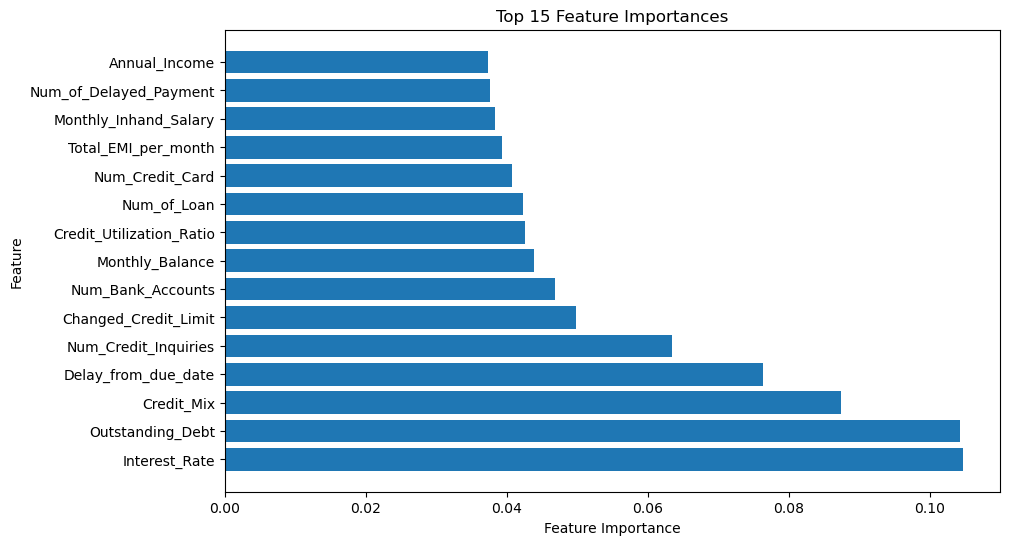

In [46]:
feature_importances = best_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
top_features = x_train.columns[sorted_indices[:15]]
plt.figure(figsize=(10, 6))
plt.barh(range(15), feature_importances[sorted_indices[:15]], align='center')
plt.yticks(range(15), top_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importances')
plt.show()

In [47]:
top_features

Index(['Interest_Rate', 'Outstanding_Debt', 'Credit_Mix',
       'Delay_from_due_date', 'Num_Credit_Inquiries', 'Changed_Credit_Limit',
       'Num_Bank_Accounts', 'Monthly_Balance', 'Credit_Utilization_Ratio',
       'Num_of_Loan', 'Num_Credit_Card', 'Total_EMI_per_month',
       'Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Annual_Income'],
      dtype='object')

In [48]:
#  Performance Validation
y_pred_test = best_model.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", accuracy_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

Testing Accuracy: 0.8562596599690881
Classification Report:
              precision    recall  f1-score   support

        Good       0.86      0.94      0.90     10930
        Poor       0.85      0.89      0.87     11003
    Standard       0.85      0.74      0.79     11064

    accuracy                           0.86     32997
   macro avg       0.86      0.86      0.85     32997
weighted avg       0.86      0.86      0.85     32997



 # Model Deployment 

In [55]:
X_train_selected = x_train[top_features ]
X_test_selected = x_test[top_features ]
model_rfc = RandomForestClassifier()
#Model Training
model_rfc.fit(X_train_selected, y_train)

#Save the Model
prediction = model_rfc.predict(X_test_selected)
print(best_model, accuracy_score(y_test, prediction))
pickle.dump(model_rfc,open('credit_score_model.pkl','wb'))



RandomForestClassifier(n_estimators=10) 0.8700790980998273


In [56]:
X_train_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76992 entries, 76954 to 15795
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Interest_Rate             76992 non-null  float64
 1   Outstanding_Debt          76992 non-null  float64
 2   Credit_Mix                76992 non-null  int32  
 3   Delay_from_due_date       76992 non-null  float64
 4   Num_Credit_Inquiries      76992 non-null  float64
 5   Changed_Credit_Limit      76992 non-null  float64
 6   Num_Bank_Accounts         76992 non-null  float64
 7   Monthly_Balance           76992 non-null  float64
 8   Credit_Utilization_Ratio  76992 non-null  float64
 9   Num_of_Loan               76992 non-null  float64
 10  Num_Credit_Card           76992 non-null  float64
 11  Total_EMI_per_month       76992 non-null  float64
 12  Monthly_Inhand_Salary     76992 non-null  float64
 13  Num_of_Delayed_Payment    76992 non-null  float64
 14  An

In [57]:
f=open("C://Users/LENOVO/credit_score_model.pkl","rb")
our_model= pickle.load(f)

In [58]:
p= our_model.predict(X_train_selected)

In [59]:
p

array(['Good', 'Poor', 'Poor', ..., 'Poor', 'Poor', 'Standard'],
      dtype=object)

In [74]:
df_cleaned

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,4.0,1,809.98,0.240765,1,49.574949,21.465380,2,0.264010,Good
1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,4.0,1,809.98,0.421528,1,49.574949,21.465380,3,0.240467,Good
2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,4.0,1,809.98,0.303817,1,49.574949,21.465380,4,0.279822,Good
3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,4.0,1,809.98,0.401516,1,49.574949,21.465380,5,0.188780,Good
4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,4.0,1,809.98,0.169294,1,49.574949,21.465380,1,0.288507,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,3.0,1,502.38,0.517466,1,35.104023,24.028477,0,0.405417,Poor
99996,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,3.0,1,502.38,0.725744,1,35.104023,24.028477,1,0.419598,Poor
99997,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,...,3.0,1,502.38,0.750090,1,35.104023,24.028477,0,0.436629,Poor
99998,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,...,3.0,1,502.38,0.481281,1,35.104023,24.028477,3,0.269646,Standard


In [77]:
data['Credit_Score']= LabelEncoder().fit_transform(data['Credit_Score'])
data['Credit_Score'].value_counts()#good,poor,standard.

2    52399
1    28678
0    16923
Name: Credit_Score, dtype: int64

In [78]:
data['Credit_Score'].unique()

array([0, 2, 1])

In [79]:
data

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,4.0,1,809.98,0.240765,1,49.574949,21.465380,2,0.264010,0
1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,4.0,1,809.98,0.421528,1,49.574949,21.465380,3,0.240467,0
2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,4.0,1,809.98,0.303817,1,49.574949,21.465380,4,0.279822,0
3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,4.0,1,809.98,0.401516,1,49.574949,21.465380,5,0.188780,0
4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,4.0,1,809.98,0.169294,1,49.574949,21.465380,1,0.288507,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,...,3.0,1,502.38,0.517466,1,35.104023,24.028477,0,0.405417,1
99996,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,...,3.0,1,502.38,0.725744,1,35.104023,24.028477,1,0.419598,1
99997,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,...,3.0,1,502.38,0.750090,1,35.104023,24.028477,0,0.436629,1
99998,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,...,3.0,1,502.38,0.481281,1,35.104023,24.028477,3,0.269646,2


In [80]:
#generating new_data csv to read dataframe and do feature evaluation and prediction
df1=data.to_csv("final_credit_data.csv",index=False)
df1

In [83]:
data.columns


Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')